# TOPAZ 4b Arctic reanalysis


<img src="topaz_area.png"
     alt="Model domain, from the met.no Ocean Models page"
     style="float: left; margin-right: 30px;" 
    width="200"/>

### About the product

Referred to as *Arctic Ocean Physics Reanalysis* or `ARCTIC_MULTIYEAR_PHY_002_003` at Copernicus. Equivalent to the model run at MET.

- Product user manual [here](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-ARC-PUM-002-ALL.pdf).


**Products**

Looking here at the physics reanalysis. There are also various forecast products (full 3D physics, tides and storm surges, biogeochemistry, ice..) and a reanalysis with biogeochemistry.  


### About the data

#### Reanalysis product

- **Arctic and North Atlantic** (>50N in the N-Atl, does not expend past the Bering Strait )
- **Spatial resolution**: *"Fairly homogeneous horizontal spacing* ***(between 11 and 16 km)*** "
- HYCOM ocean model /  one thickness category sea ice model.. 
- **Reanalysis** assimilating ocean and sea ice observations.
- Output on 40 fixed depth levels. (The actual model grid has 50 non-constant vertical levels)
- **1 Jan 1991** to **31 Dec 2022**
- Available daily, monthly and yearly.
- Variables: pot temp, sal, SSH, mixed layer thickness, ocean velocity, ice concentration/thickness/velocity.. (Variable names area bit weird but the metadata attributes are clarifying.)

#### Forcing

- Initialized from 1973 WOA climatology.
- Atmospheric forcing from ERA5.
- Climatological estimate of Bering Strait inflow.
- Estimates of river runoff.
- GrIS runoff estimated from the 30 largest glaciers in a fairly crude way.

##### Assimilated observations

Extensive ocean and sea ice variables. See p27 [here](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-ARC-PUM-002-ALL.pdf#27) for details.

#### Access

- The files are  served at the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products). It seems the best way to access them is the `copernicusmarine` API. Requires login with (free) registration.
-  The [Copernicus Marine Service](https://data.marine.copernicus.eu/product/ARCTIC_MULTIYEAR_PHY_002_003/services) hosts daily, monthly and yearly data:
    - `cmems_mod_arc_phy_my_topaz4_P1D-m`
    - `cmems_mod_arc_phy_my_topaz4_P1M`
    - `cmems_mod_arc_phy_my_topaz4_P1Y`

____

#### Load data using `copernicusmarine`

Modified from the example in [this guide](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely).

In [6]:
from matplotlib import pyplot as plt
import copernicusmarine
import numpy as np
import cmocean
import xarray as xr

Using the `copernicusmarine` API, we can specify a subset of the (presumably giant) dataset.

My understanding is that this does lazy loading of the subset, with `copernicusmarine.open_dataset` being analogous to `xarray.open_dataset`.

#### Data request for potential temperature

In [24]:
# Set parameters
data_request = {
   "dataset_id" : "cmems_mod_arc_phy_my_topaz4_P1D-m",
   "longitude" : [10, 50], 
   "latitude" : [77, 83],
   "time" : ["2010-01-01", "2022-01-01"],
 #  "variables" : ["sea_surface_temperature"]
}

# Load xarray dataset
ds = copernicusmarine.open_dataset(
    dataset_id = data_request["dataset_id"],
    minimum_longitude = data_request["longitude"][0],
    maximum_longitude = data_request["longitude"][1],
    minimum_latitude = data_request["latitude"][0],
    maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    #variables = data_request["variables"]
)

INFO - 2024-05-02T20:37:30Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-05-02T20:37:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-05-02T20:37:32Z - Service was not specified, the default one was selected: "arco-time-series"


____

### *Example:* Plot ocean temperature at 100 m depth

##### Choose a depth level and a time stamp we want to examine 

In [25]:
depth_closest = 100
date = '2019-03-03'

##### Make subsets of the files with only this depth level and time stamp

In [26]:
ds_select = ds.sel(depth = depth_closest, time= date, method = 'nearest')

**Plot ocean temperature** 

Can take a few minutes! 

/tmp/ipykernel_64355/81890260.py:4: UserWarning: linewidths is ignored by contourf
  ax.contourf(ds.model_depth, levels = [-1, 1], colors = ['gray','none'], linewidths = 0.7)


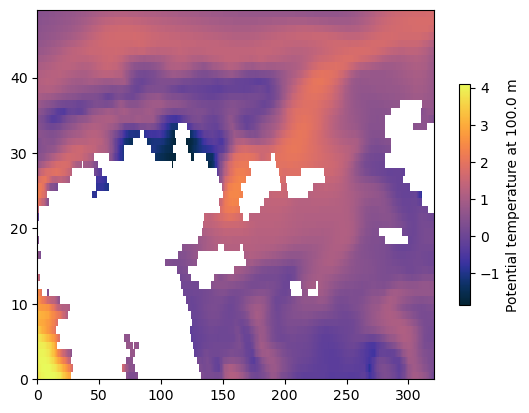

In [27]:
fig, ax = plt.subplots()#; ax.set_aspect('equal')
C = ax.pcolormesh(ds_select.thetao, cmap = cmocean.cm.thermal)
ax.contour(ds.model_depth, levels = [0], colors = ['k',], linewidths = 0.7)
ax.contourf(ds.model_depth, levels = [-1, 1], colors = ['gray','none'], linewidths = 0.7)

plt.colorbar(C, shrink = 0.6,
             label = f'Potential temperature at {float(ds_select.depth):.1f} m')